In [ ]:
!pip install datasets
!pip install transformers==4.31.0
!pip install -U accelerate
!pip install optuna
!pip install optuna-dashboard
!pip install wandb -qU

In [2]:
import transformers

transformers.__version__

'4.31.0'

#Data

In [41]:
from google.colab import drive

drive.mount('/content/drive')

127.0.0.1 - - [17/Sep/2023 16:24:22] "GET /api/studies/0?after=2 HTTP/1.1" 200 3303


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
preprocessing_column = "Light Stemming"

In [5]:
import pickle

with open('/content/drive/MyDrive/emotion_data_tweets/cleaned text data/train.pkl', 'rb') as f:
    X_train = pickle.load(f)

with open('/content/drive/MyDrive/emotion_data_tweets/cleaned text data/test.pkl', 'rb') as f:
    X_test = pickle.load(f)

with open('/content/drive/MyDrive/emotion_data_tweets/cleaned text data/val.pkl', 'rb') as f:
    X_dev = pickle.load(f)

In [6]:
label_to_class = {
    0: 'none',
    1: 'anger',
    2: 'joy',
    3: 'sadness',
    4: 'love',
    5: 'sympathy',
    6: 'surprise',
    7: 'fear'
}

classes = ['none', 'anger', 'joy', 'sadness', 'love', 'sympathy', 'surprise', 'fear']

In [7]:
X_train.head()

tweet  label  \
5081  1996   Ÿäÿß ŸÖŸáŸÜÿØ Ÿäÿßÿ≠ÿ®Ÿäÿ®Ÿä ÿßŸÜÿ™ ÿ™ÿØŸàÿ± ŸÑÿ®ÿ¥ ŸÖÿπ ÿßŸä ÿßÿ≠ÿØ ...      1   
8264  ÿ≠ŸÑÿ® ÿπŸÅÿ±ŸäŸÜ  ÿßÿπÿ™ŸÇÿßŸÑ ÿπÿ¥ÿ±ÿßÿ™ ÿßŸÑÿ¥ÿ®ÿßÿ® ŸÖŸÜ ŸÇÿ±ŸäŸá ÿ®ÿßÿ≥Ÿàÿ∑Ÿá ...      3   
9777             ÿßŸÜÿß ŸÜŸÅÿ≥Ÿä ŸÖÿ±Ÿá ÿßÿ¨ÿ±ÿ® ÿßŸÉŸàŸÜ ŸÑŸäŸÉ ÿ≠ÿØ ÿßŸÇÿ±ÿ® : )      3   
740   ÿßŸÑÿµÿ±ÿßÿ≠Ÿá ÿßÿ≠ÿ≥ÿßÿ≥ ŸÖÿÆÿ≤Ÿä ŸàŸÜÿ≠ŸÜ ŸÜŸÉÿ™ŸÅŸä ÿ®ÿßŸÑÿ™ŸÖÿ´ŸäŸÑ ÿßŸÑŸÖÿ¥ÿ±ŸÅ ...      3   
6537  57   ÿπÿßÿ¨ŸÑ ÿßŸÑÿßŸäÿ∑ÿßŸÑŸä ŸÅÿßÿ®ŸäŸà ÿ®ÿßÿ≥ŸÑ ŸäŸÅŸàÿ≤ ÿ®ÿØŸáÿ® ÿßŸÑÿßŸàŸÑŸä...      0   

                             tweet_with_replaced_emojis  \
5081  1996   Ÿäÿß ŸÖŸáŸÜÿØ Ÿäÿßÿ≠ÿ®Ÿäÿ®Ÿä ÿßŸÜÿ™ ÿ™ÿØŸàÿ± ŸÑÿ®ÿ¥ ŸÖÿπ ÿßŸä ÿßÿ≠ÿØ ...   
8264  ÿ≠ŸÑÿ® ÿπŸÅÿ±ŸäŸÜ  ÿßÿπÿ™ŸÇÿßŸÑ ÿπÿ¥ÿ±ÿßÿ™ ÿßŸÑÿ¥ÿ®ÿßÿ® ŸÖŸÜ ŸÇÿ±ŸäŸá ÿ®ÿßÿ≥Ÿàÿ∑Ÿá ...   
9777             ÿßŸÜÿß ŸÜŸÅÿ≥Ÿä ŸÖÿ±Ÿá ÿßÿ¨ÿ±ÿ® ÿßŸÉŸàŸÜ ŸÑŸäŸÉ ÿ≠ÿØ ÿßŸÇÿ±ÿ® : )   
740   ÿßŸÑÿµÿ±ÿßÿ≠Ÿá ÿßÿ≠ÿ≥ÿßÿ≥ ŸÖÿÆÿ≤Ÿä ŸàŸÜÿ≠ŸÜ ŸÜŸÉÿ™ŸÅŸä ÿ®ÿßŸÑÿ™ŸÖÿ´ŸäŸÑ ÿßŸÑŸÖÿ¥ÿ±ŸÅ ...   
6537  57   ÿπÿßÿ¨ŸÑ ÿßŸÑÿßŸäÿ∑ÿßŸÑŸä ŸÅÿßÿ®ŸäŸà ÿ®ÿßÿ≥ŸÑ ŸäŸÅŸàÿ≤ ÿ®ÿØŸáÿ® ÿßŸÑÿßŸàŸÑŸä...   

                      cleaned_data_with_replaced_emojis  \
5081  ŸäÿßŸÖŸáŸÜÿØ Ÿäÿßÿ≠ÿ®Ÿäÿ®Ÿä ÿ™ÿØŸàÿ± ŸÑÿ®ÿ¥ ÿßŸä ÿßÿ≠ÿØ ŸÖÿ™ÿßŸÉÿØ ÿßÿ®Ÿà ÿ¨ÿßÿ≥ŸÖ ...   
8264  ÿ≠ŸÑÿ® ÿπŸÅÿ±ŸäŸÜ ÿßÿπÿ™ŸÇÿßŸÑ ÿπÿ¥ÿ±ÿßÿ™ ÿßŸÑÿ¥ÿ®ÿßÿ® ŸÇÿ±ŸäŸá ÿ®ÿßÿ≥Ÿàÿ∑Ÿá ÿ±ŸäŸÅ ...   
9777                             ŸÖÿ±Ÿá ÿßÿ¨ÿ±ÿ® ÿßŸÉŸàŸÜ ŸÑŸäŸÉ ÿßŸÇÿ±ÿ®   
740   ÿßŸÑÿµÿ±ÿßÿ≠Ÿá ÿßÿ≠ÿ≥ÿßÿ≥ ŸÖÿÆÿ≤Ÿä ŸÜŸÉÿ™ŸÅŸä ÿ®ÿßŸÑÿ™ŸÖÿ´ŸäŸÑ ÿßŸÑŸÖÿ¥ÿ±ŸÅ ÿßŸÑÿßŸàŸÑ...   
6537  ÿπÿßÿ¨ŸÑ ÿßŸÑÿßŸäÿ∑ÿßŸÑŸä ŸÅÿßÿ®ŸäŸà ÿ®ÿßÿ≥ŸÑ ŸäŸÅŸàÿ≤ ÿ®ÿØŸáÿ® ÿßŸÑÿßŸàŸÑŸäŸÖÿ®ŸäÿßÿØ...   

                                         Light Stemming  
5081  ŸäÿßŸÖŸáŸÜÿØ Ÿäÿßÿ≠ÿ®Ÿäÿ®Ÿä ÿ™ÿØŸàÿ± ŸÑÿ®ÿ¥ ÿßŸä ÿßÿ≠ÿØ ŸÖÿ™ÿßŸÉÿØ ÿßÿ®Ÿà ÿ¨ÿßÿ≥ŸÖ ...  
8264  ÿ≠ŸÑÿ® ÿπŸÅÿ± ÿßÿπÿ™ŸÇÿßŸÑ ÿπÿ¥ÿ± ÿßŸÑÿ¥ÿ®ÿßÿ® ŸÇÿ±ŸäŸá ÿ®ÿßÿ≥Ÿàÿ∑Ÿá ÿ±ŸäŸÅ ÿπŸÅÿ± ...  
9777                             ŸÖÿ±Ÿá ÿßÿ¨ÿ±ÿ® ÿßŸÉŸàŸÜ ŸÑŸäŸÉ ÿßŸÇÿ±ÿ®  
740   ÿßŸÑÿµÿ±ÿßÿ≠Ÿá ÿßÿ≠ÿ≥ÿßÿ≥ ŸÖÿÆÿ≤Ÿä ŸÜŸÉÿ™ŸÅŸä ÿ®ÿßŸÑÿ™ŸÖÿ´ŸäŸÑ ÿßŸÑŸÖÿ¥ÿ±ŸÅ ÿßŸÑÿßŸàŸÑ...  
6537  ÿπÿßÿ¨ŸÑ ÿßŸÑÿßŸäÿ∑ÿßŸÑŸä ŸÅÿßÿ®ŸäŸà ÿ®ÿßÿ≥ŸÑ ŸäŸÅŸàÿ≤ ÿ®ÿØŸáÿ® ÿßŸÑÿßŸàŸÑŸäŸÖÿ®ŸäÿßÿØ...

In [8]:
X_train = X_train[['tweet', preprocessing_column, 'label']]
y_train = X_train['label']
X_test = X_test[['tweet', preprocessing_column, 'label']]
y_test = X_test['label']
X_dev = X_dev[['tweet', preprocessing_column, 'label']]
y_dev = X_dev['label']

In [9]:
X_train.shape, X_test.shape, X_dev.shape

((7045, 3), (1510, 3), (1510, 3))

In [10]:
X_train

tweet  \
5081  1996   Ÿäÿß ŸÖŸáŸÜÿØ Ÿäÿßÿ≠ÿ®Ÿäÿ®Ÿä ÿßŸÜÿ™ ÿ™ÿØŸàÿ± ŸÑÿ®ÿ¥ ŸÖÿπ ÿßŸä ÿßÿ≠ÿØ ...   
8264  ÿ≠ŸÑÿ® ÿπŸÅÿ±ŸäŸÜ  ÿßÿπÿ™ŸÇÿßŸÑ ÿπÿ¥ÿ±ÿßÿ™ ÿßŸÑÿ¥ÿ®ÿßÿ® ŸÖŸÜ ŸÇÿ±ŸäŸá ÿ®ÿßÿ≥Ÿàÿ∑Ÿá ...   
9777             ÿßŸÜÿß ŸÜŸÅÿ≥Ÿä ŸÖÿ±Ÿá ÿßÿ¨ÿ±ÿ® ÿßŸÉŸàŸÜ ŸÑŸäŸÉ ÿ≠ÿØ ÿßŸÇÿ±ÿ® : )   
740   ÿßŸÑÿµÿ±ÿßÿ≠Ÿá ÿßÿ≠ÿ≥ÿßÿ≥ ŸÖÿÆÿ≤Ÿä ŸàŸÜÿ≠ŸÜ ŸÜŸÉÿ™ŸÅŸä ÿ®ÿßŸÑÿ™ŸÖÿ´ŸäŸÑ ÿßŸÑŸÖÿ¥ÿ±ŸÅ ...   
6537  57   ÿπÿßÿ¨ŸÑ ÿßŸÑÿßŸäÿ∑ÿßŸÑŸä ŸÅÿßÿ®ŸäŸà ÿ®ÿßÿ≥ŸÑ ŸäŸÅŸàÿ≤ ÿ®ÿØŸáÿ® ÿßŸÑÿßŸàŸÑŸä...   
...                                                 ...   
5734  ÿßÿ≠ŸÖÿØ ÿßŸÑÿßÿ≠ŸÖÿ± ÿßŸàÿ≠ÿ¥ ŸÑÿßÿπÿ® ŸÅŸä ÿßŸÑÿßŸàŸÑŸäŸÖÿ®ŸäÿßÿØ ... ÿßÿÆÿ±Ÿá ...   
5191                               ÿßŸÜÿ™Ÿä ŸÉÿßŸÜ ŸÇÿµÿØŸÉ ÿπŸÑŸäÿß !   
5390  Ÿäÿß ÿ¨ÿØÿπÿßŸÜ ŸÑŸà ÿ≥ŸÖÿ≠ÿ™Ÿàÿß ŸÖÿ¥ ŸÉŸÑ Ÿàÿßÿ≠ÿØ ÿπŸÜÿØŸá ŸÖŸäÿ™ŸäŸÜ ÿßŸÖ ÿπŸÇ...   
860        Ÿáÿ™ŸàÿØŸäŸÜÿß ŸÅŸä ÿØŸáŸäÿß Ÿäÿß ÿ®ŸÑÿßŸÑ ÿßÿ±ÿ≠ŸÖŸÜÿß ÿØŸá ŸÖÿ¥ ŸàŸÇÿ™ ŸÇŸÑÿ¥   
7270  ÿ¥ÿπÿ® ÿ¨ŸÖŸáŸàÿ±ŸäŸá ŸÖÿµÿ± ÿßŸÑÿπÿ±ÿ®ŸäŸá ŸäŸáŸÜÿ¶ ÿØŸàŸÑŸá ÿßŸÑŸÇŸàÿßÿ™ ÿßŸÑŸÖÿ≥ŸÑ...   

                                         Light Stemming  label  
5081  ŸäÿßŸÖŸáŸÜÿØ Ÿäÿßÿ≠ÿ®Ÿäÿ®Ÿä ÿ™ÿØŸàÿ± ŸÑÿ®ÿ¥ ÿßŸä ÿßÿ≠ÿØ ŸÖÿ™ÿßŸÉÿØ ÿßÿ®Ÿà ÿ¨ÿßÿ≥ŸÖ ...      1  
8264  ÿ≠ŸÑÿ® ÿπŸÅÿ± ÿßÿπÿ™ŸÇÿßŸÑ ÿπÿ¥ÿ± ÿßŸÑÿ¥ÿ®ÿßÿ® ŸÇÿ±ŸäŸá ÿ®ÿßÿ≥Ÿàÿ∑Ÿá ÿ±ŸäŸÅ ÿπŸÅÿ± ...      3  
9777                             ŸÖÿ±Ÿá ÿßÿ¨ÿ±ÿ® ÿßŸÉŸàŸÜ ŸÑŸäŸÉ ÿßŸÇÿ±ÿ®      3  
740   ÿßŸÑÿµÿ±ÿßÿ≠Ÿá ÿßÿ≠ÿ≥ÿßÿ≥ ŸÖÿÆÿ≤Ÿä ŸÜŸÉÿ™ŸÅŸä ÿ®ÿßŸÑÿ™ŸÖÿ´ŸäŸÑ ÿßŸÑŸÖÿ¥ÿ±ŸÅ ÿßŸÑÿßŸàŸÑ...      3  
6537  ÿπÿßÿ¨ŸÑ ÿßŸÑÿßŸäÿ∑ÿßŸÑŸä ŸÅÿßÿ®ŸäŸà ÿ®ÿßÿ≥ŸÑ ŸäŸÅŸàÿ≤ ÿ®ÿØŸáÿ® ÿßŸÑÿßŸàŸÑŸäŸÖÿ®ŸäÿßÿØ...      0  
...                                                 ...    ...  
5734  ÿßÿ≠ŸÖÿØ ÿßŸÑÿßÿ≠ŸÖÿ± ÿßŸàÿ≠ÿ¥ ŸÑÿßÿπÿ® ÿßŸÑÿßŸàŸÑŸäŸÖÿ®ŸäÿßÿØ ÿßÿÆÿ±Ÿá ÿ™ÿ∂ÿÆŸäŸÖ ÿß...      3  
5191                                     ÿßŸÜÿ™Ÿä ŸÇÿµÿØŸÉ ÿπŸÑŸäÿß      6  
5390  ÿ¨ÿØÿπ ÿ≥ŸÖÿ≠ÿ™ ŸÖÿ¥ Ÿàÿßÿ≠ÿØ ŸÖŸäÿ™ ÿßŸÖ ÿπŸÇÿØŸá ŸÜŸÅÿ≥ŸäŸá Ÿäÿ±Ÿàÿ≠ ÿØÿßÿÆŸÑ ÿ¥...      1  
860                       Ÿáÿ™ŸàÿØŸä ÿØŸáŸäÿß Ÿäÿßÿ®ŸÑÿßŸÑ ÿßÿ±ÿ≠ŸÖ ŸÖÿ¥ ŸÇŸÑÿ¥      1  
7270  ÿ¥ÿπÿ® ÿ¨ŸÖŸáŸàÿ±ŸäŸá ŸÖÿµÿ± ÿßŸÑÿπÿ±ÿ®ŸäŸá ŸäŸáŸÜÿ¶ ÿØŸàŸÑŸá ÿßŸÑŸÇŸà ÿßŸÑŸÖÿ≥ŸÑÿ≠Ÿá...      1  

[7045 rows x 3 columns]

In [11]:
X_train = X_train.rename_axis('id')
X_test = X_test.rename_axis('id')
X_dev = X_dev.rename_axis('id')

X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
X_dev = X_dev.reset_index(drop=True)

In [12]:
from datasets import Dataset

X_train = Dataset.from_pandas(X_train)
X_test = Dataset.from_pandas(X_test)
X_dev = Dataset.from_pandas(X_dev)
X_train, X_test, X_dev

(Dataset({
     features: ['tweet', 'Light Stemming', 'label'],
     num_rows: 7045
 }),
 Dataset({
     features: ['tweet', 'Light Stemming', 'label'],
     num_rows: 1510
 }),
 Dataset({
     features: ['tweet', 'Light Stemming', 'label'],
     num_rows: 1510
 }))

#Transformer

##Setup

In [13]:
model_checkpoint = 'UBC-NLP/MARBERTv2'

In [14]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained(model_checkpoint, use_fast=True)

In [15]:
def tokenize_function(examples):
    return tokenizer(examples[preprocessing_column], padding="max_length", truncation=True, max_length=37)

X_train = X_train.map(tokenize_function, batched=True, num_proc = 8)
X_dev = X_test.map(tokenize_function, batched=True, num_proc = 8)
X_test = X_test.map(tokenize_function, batched=True, num_proc = 8)

Map (num_proc=8):   0%|          | 0/7045 [00:00<?, ? examples/s]

Map (num_proc=8):   0%|          | 0/1510 [00:00<?, ? examples/s]

Map (num_proc=8):   0%|          | 0/1510 [00:00<?, ? examples/s]

##Model

###Train

In [16]:
import numpy as np
from sklearn.metrics import (accuracy_score,
                             f1_score,
                             precision_score,
                             recall_score
                             )

def compute_metrics(p):
    preds = np.argmax(p.predictions, axis=1)
    assert len(preds) == len(p.label_ids)

    macro_f1 = f1_score(p.label_ids,preds,average='macro', zero_division=1)
    macro_precision = precision_score(p.label_ids,preds,average='macro', zero_division=1)
    macro_recall = recall_score(p.label_ids,preds,average='macro', zero_division=1)
    acc = accuracy_score(p.label_ids,preds)
    return {
      'macro_f1' : macro_f1,
      'macro_precision': macro_precision,
      'macro_recall': macro_recall,
      'accuracy': acc
    }

In [17]:
import wandb

wandb.login(key="4e35381e2cbc42bf28886d9ae41505c75f15dc8d")

wandb: Currently logged in as: ahmedtawfiiiq (emotion_justification). Use `wandb login --relogin` to force relogin
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [18]:
import os

# set the wandb project where this run will be logged
os.environ["WANDB_PROJECT"]="emotion_sentiment_analysis"

# save your trained model checkpoint to wandb
os.environ["WANDB_LOG_MODEL"]="true"

# turn off watch to log faster
os.environ["WANDB_WATCH"]="false"

In [19]:
import optuna
from transformers import TrainingArguments, Trainer, EarlyStoppingCallback
from transformers import AutoModelForSequenceClassification
from torch.optim import AdamW


def objective(trial: optuna.Trial):
    model = AutoModelForSequenceClassification.from_pretrained(model_checkpoint, num_labels=8)
    # optimizer = AdamW(model.parameters(), lr=1e-5)
    training_args = TrainingArguments(
        output_dir="./train",
        learning_rate=trial.suggest_float("learning_rate", low=1e-5, high=5e-5, log=True),
        # learning_rate = 5.9572096694887074e-05,
        weight_decay=trial.suggest_float("weight_decay", 0.0, 0.1),
        num_train_epochs=trial.suggest_int("num_train_epochs", low=1, high=5),
        # num_train_epochs=4,
        per_device_train_batch_size=trial.suggest_categorical("per_device_train_batch_size", [16, 32]),
        # per_device_train_batch_size=16,
        per_device_eval_batch_size=16,
        # seed = 34,
        seed=trial.suggest_int("seed", 10, 35),
        logging_steps = 100,
        load_best_model_at_end=True,
        evaluation_strategy="steps",
        metric_for_best_model = 'macro_f1', # relative to training metrics to prevent overfitting
        report_to="wandb"
    )
    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=X_train,
        eval_dataset=X_dev,
        compute_metrics=compute_metrics,
        # optimizers=(optimizer, None)
    )
    result = trainer.train()
    metrics = trainer.evaluate()
    return metrics["eval_macro_f1"], result.training_loss

In [20]:
# Run optimization
storage = optuna.storages.InMemoryStorage()
study = optuna.create_study(storage=storage,
                            study_name="hyper-parameter-search",
                            directions=["maximize", "minimize"],
                            pruner=optuna.pruners.HyperbandPruner())
study.optimize(objective, n_trials=2)

wandb.finish()

[I 2023-09-17 15:57:56,257] A new study created in memory with name: hyper-parameter-search
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at UBC-NLP/MARBERTv2 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
wandb: WARNING Changes to your `wandb` environment variables will be ignored because your `wandb` session has already started. For more information on how to modify your settings with `wandb.init()` arguments, please refer to https://wandb.me/wandb-init.
wandb: Tracking run with wandb version 0.15.10
wand

[I 2023-09-17 15:59:32,964] Trial 0 finished with values: [0.6721954050892932, 1.3321262031658743] and parameters: {'learning_rate': 2.647024526368426e-05, 'weight_decay': 0.03161443556209128, 'num_train_epochs': 1, 'per_device_train_batch_size': 32, 'seed': 13}. 
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at UBC-NLP/MARBERTv2 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


[I 2023-09-17 16:02:58,720] Trial 1 finished with values: [0.745126428487524, 0.8290072374062744] and parameters: {'learning_rate': 3.445716626454257e-05, 'weight_decay': 0.015627080588734864, 'num_train_epochs': 2, 'per_device_train_batch_size': 16, 'seed': 23}. 
wandb: Waiting for W&B process to finish... (success).
wandb: 
wandb: Run history:
wandb:                  eval/accuracy ‚ñÇ‚ñÖ‚ñÖ‚ñÅ‚ñÜ‚ñá‚ñá‚ñà‚ñá‚ñà‚ñà‚ñà
wandb:                      eval/loss ‚ñà‚ñÖ‚ñÖ‚ñà‚ñÑ‚ñÇ‚ñÇ‚ñÅ‚ñÅ‚ñÅ‚ñÅ‚ñÅ
wandb:                  eval/macro_f1 ‚ñÇ‚ñÖ‚ñÖ‚ñÅ‚ñÜ‚ñá‚ñá‚ñà‚ñá‚ñà‚ñà‚ñà
wandb:           eval/macro_precision ‚ñÅ‚ñÑ‚ñÑ‚ñÅ‚ñÖ‚ñÜ‚ñà‚ñá‚ñá‚ñà‚ñà‚ñá
wandb:              eval/macro_recall ‚ñÇ‚ñÖ‚ñÖ‚ñÅ‚ñÜ‚ñá‚ñá‚ñà‚ñá‚ñà‚ñà‚ñà
wandb:                   eval/runtime ‚ñÅ‚ñÅ‚ñà‚ñÇ‚ñÑ‚ñÖ‚ñá‚ñá‚ñá‚ñá‚ñá‚ñá
wandb:        eval/samples_per_second ‚ñà‚ñà‚ñÅ‚ñá‚ñÖ‚ñÑ‚ñÇ‚ñÇ‚ñÇ‚ñÇ‚ñÇ‚ñÇ
wandb:          eval/steps_per_second ‚ñà‚ñà‚ñÅ‚ñá‚ñÖ‚ñÑ‚ñÇ‚ñÇ‚ñÇ‚ñÇ‚ñÇ‚ñÇ
wandb:                    train/epoch ‚ñÇ‚ñÇ‚ñÑ‚ñÑ‚ñ

In [21]:
import optuna
import threading
from google.colab import output
from optuna_dashboard import run_server

# Start Optuna Dashboard
port = 8090
thread = threading.Thread(target=run_server, args=(storage,), kwargs={"port": port})
thread.start()
output.serve_kernel_port_as_window(port, path='/dashboard/')

Bottle v0.12.25 server starting up (using WSGIRefServer())...


<IPython.core.display.Javascript object>

Listening on http://localhost:8090/
Hit Ctrl-C to quit.



###Best Parameters

In [22]:
print(study.best_trials[0].params)

{'learning_rate': 3.445716626454257e-05, 'weight_decay': 0.015627080588734864, 'num_train_epochs': 2, 'per_device_train_batch_size': 16, 'seed': 23}


In [23]:
model = AutoModelForSequenceClassification.from_pretrained(model_checkpoint, num_labels=8)
training_args = TrainingArguments(output_dir="./results",
                                  logging_steps = 100,
                                  evaluation_strategy="steps")
trainer = Trainer(model=model,
                  args=training_args,
                  train_dataset=X_train,
                  eval_dataset=X_dev,
                  compute_metrics=compute_metrics)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at UBC-NLP/MARBERTv2 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [24]:
for n, v in study.best_trials[0].params.items():
    setattr(trainer.args, n, v)

trainer.train()

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
wandb: WARNING Changes to your `wandb` environment variables will be ignored because your `wandb` session has already started. For more information on how to modify your settings with `wandb.init()` arguments, please refer to https://wandb.me/wandb-init.
wandb: Tracking run with wandb version 0.15.10
wandb: Run data is saved locally in /content/wandb/run-20230917_160316-i2ksl7v3
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run rich-universe-19
wandb: ‚≠êÔ∏è View project at https://wandb.ai/emotion_justification/emotion_sentiment_analysis
wandb: üöÄ View run at https://wandb.ai/emotion_justification/emotion_sentiment_analysis/runs/i2ksl7v3


TrainOutput(global_step=882, training_loss=0.825423632078971, metrics={'train_runtime': 189.593, 'train_samples_per_second': 74.317, 'train_steps_per_second': 4.652, 'total_flos': 267920070177120.0, 'train_loss': 0.825423632078971, 'epoch': 2.0})

In [25]:
trainer.evaluate()

{'eval_loss': 0.7339994311332703,
 'eval_macro_f1': 0.7602103614024804,
 'eval_macro_precision': 0.7657291110689279,
 'eval_macro_recall': 0.7584295426044253,
 'eval_accuracy': 0.7615894039735099,
 'eval_runtime': 4.5007,
 'eval_samples_per_second': 335.504,
 'eval_steps_per_second': 41.994,
 'epoch': 2.0}

###Evaluate

####Test Data

In [26]:
import torch

batch_size = 16

device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [27]:
from torch.utils.data import TensorDataset, DataLoader

input_ids = [i['input_ids'] for i in X_test]
attention_masks = [i['attention_mask'] for i in X_test]

inputs = torch.tensor(input_ids)
masks = torch.tensor(attention_masks)
test_data = TensorDataset(inputs, masks)

test_dataloader = DataLoader(test_data, batch_size=batch_size)

In [28]:
from sklearn.metrics import classification_report

model = trainer.model
model.eval()
model.to(device)

test_pred = []
for input, masks in test_dataloader:
    torch.cuda.empty_cache()

    input = input.to(device)
    masks = masks.to(device)

    output = model(input, attention_mask=masks)['logits']
    predictions = torch.argmax(output, dim=1)
    predictions = predictions.cpu().detach().numpy()

    test_pred.extend(predictions)

print(classification_report(X_test['label'], test_pred, target_names=classes))

              precision    recall  f1-score   support

        none       0.71      0.85      0.77       229
       anger       0.73      0.76      0.74       200
         joy       0.66      0.63      0.65       205
     sadness       0.67      0.66      0.67       185
        love       0.79      0.80      0.80       193
    sympathy       0.92      0.90      0.91       156
    surprise       0.69      0.55      0.61       154
        fear       0.95      0.93      0.94       188

    accuracy                           0.76      1510
   macro avg       0.77      0.76      0.76      1510
weighted avg       0.76      0.76      0.76      1510



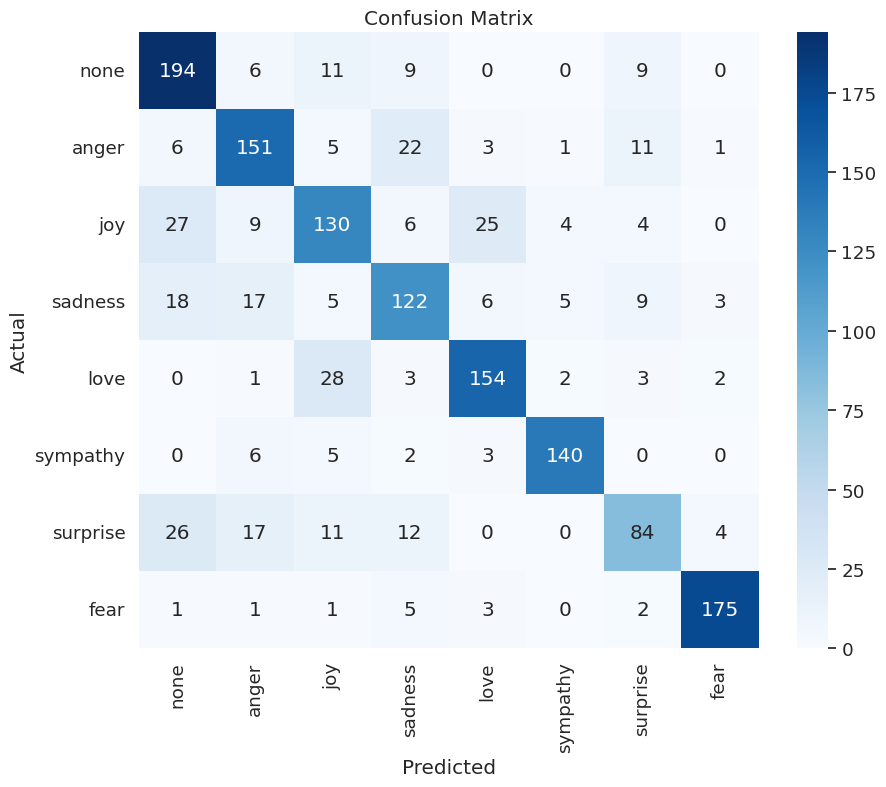

In [29]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(X_test['label'], test_pred)

plt.figure(figsize=(10, 8))
sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

####Train Data

In [30]:
from torch.utils.data import TensorDataset, DataLoader

input_ids = [i['input_ids'] for i in X_train]
attention_masks = [i['attention_mask'] for i in X_train]

inputs = torch.tensor(input_ids)
masks = torch.tensor(attention_masks)
train_data = TensorDataset(inputs, masks)

train_dataloader = DataLoader(train_data, batch_size=batch_size)

In [31]:
from sklearn.metrics import classification_report

model = trainer.model
model.eval()
model.to(device)

train_pred = []
for input, masks in train_dataloader:
    torch.cuda.empty_cache()

    input = input.to(device)
    masks = masks.to(device)

    output = model(input, attention_mask=masks)['logits']
    predictions = torch.argmax(output, dim=1)
    predictions = predictions.cpu().detach().numpy()

    train_pred.extend(predictions)

print(classification_report(X_train['label'], train_pred, target_names=classes))

              precision    recall  f1-score   support

        none       0.85      0.93      0.89      1074
       anger       0.90      0.94      0.92      1019
         joy       0.84      0.86      0.85       891
     sadness       0.86      0.84      0.85       885
        love       0.91      0.89      0.90       850
    sympathy       0.96      0.96      0.96       755
    surprise       0.86      0.72      0.78       729
        fear       0.98      0.95      0.96       842

    accuracy                           0.89      7045
   macro avg       0.89      0.89      0.89      7045
weighted avg       0.89      0.89      0.89      7045



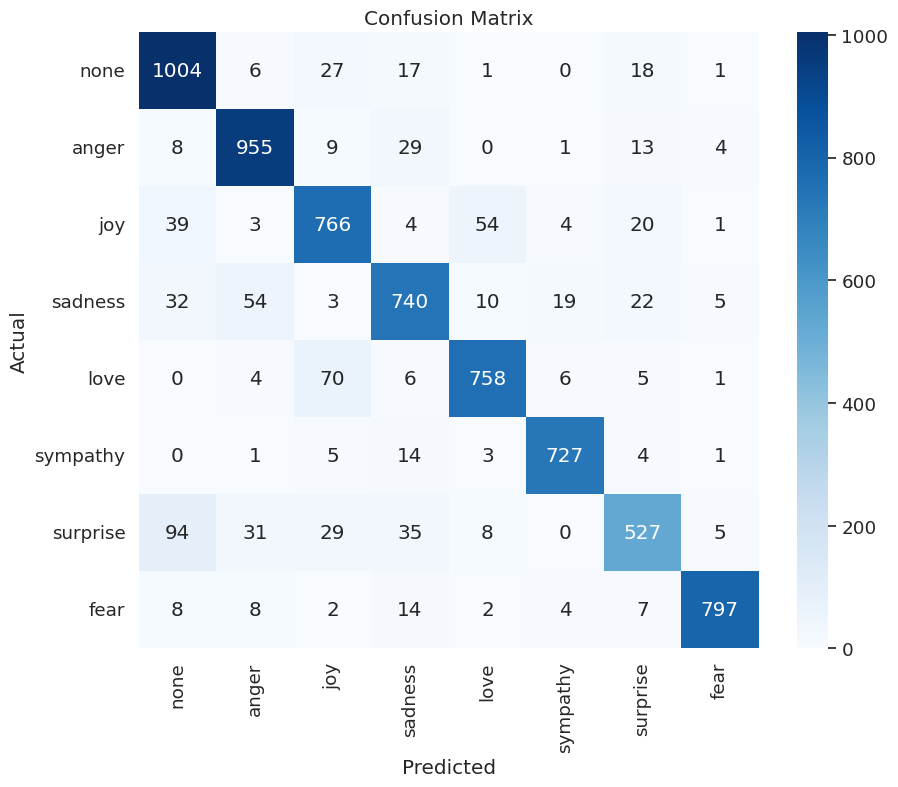

In [32]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(X_train['label'], train_pred)

plt.figure(figsize=(10, 8))
sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

##Saving the model

In [42]:
path = F"/content/drive/MyDrive/emotion_data_tweets/models"
model.save_pretrained(path)

127.0.0.1 - - [17/Sep/2023 16:24:31] "GET /api/studies/0?after=2 HTTP/1.1" 200 3303


##Loading the model

In [43]:
loaded_model = AutoModelForSequenceClassification.from_pretrained(path).to(device)

127.0.0.1 - - [17/Sep/2023 16:26:31] "GET /api/studies/0?after=2 HTTP/1.1" 200 3303
127.0.0.1 - - [17/Sep/2023 16:26:34] "GET /api/studies/0?after=2 HTTP/1.1" 200 3303


####Test Loaded Model

In [44]:
from sklearn.metrics import classification_report

loaded_model.eval()

test_pred = []
for input, masks in test_dataloader:
    torch.cuda.empty_cache()

    input = input.to(device)
    masks = masks.to(device)

    output = loaded_model(input, attention_mask=masks)['logits']
    predictions = torch.argmax(output, dim=1)
    predictions = predictions.cpu().detach().numpy()

    test_pred.extend(predictions)

print(classification_report(X_test['label'], test_pred, target_names=classes))

127.0.0.1 - - [17/Sep/2023 16:28:31] "GET /api/studies/0?after=2 HTTP/1.1" 200 3303
127.0.0.1 - - [17/Sep/2023 16:28:34] "GET /api/studies/0?after=2 HTTP/1.1" 200 3303


              precision    recall  f1-score   support

        none       0.71      0.85      0.77       229
       anger       0.73      0.76      0.74       200
         joy       0.66      0.63      0.65       205
     sadness       0.67      0.66      0.67       185
        love       0.79      0.80      0.80       193
    sympathy       0.92      0.90      0.91       156
    surprise       0.69      0.55      0.61       154
        fear       0.95      0.93      0.94       188

    accuracy                           0.76      1510
   macro avg       0.77      0.76      0.76      1510
weighted avg       0.76      0.76      0.76      1510



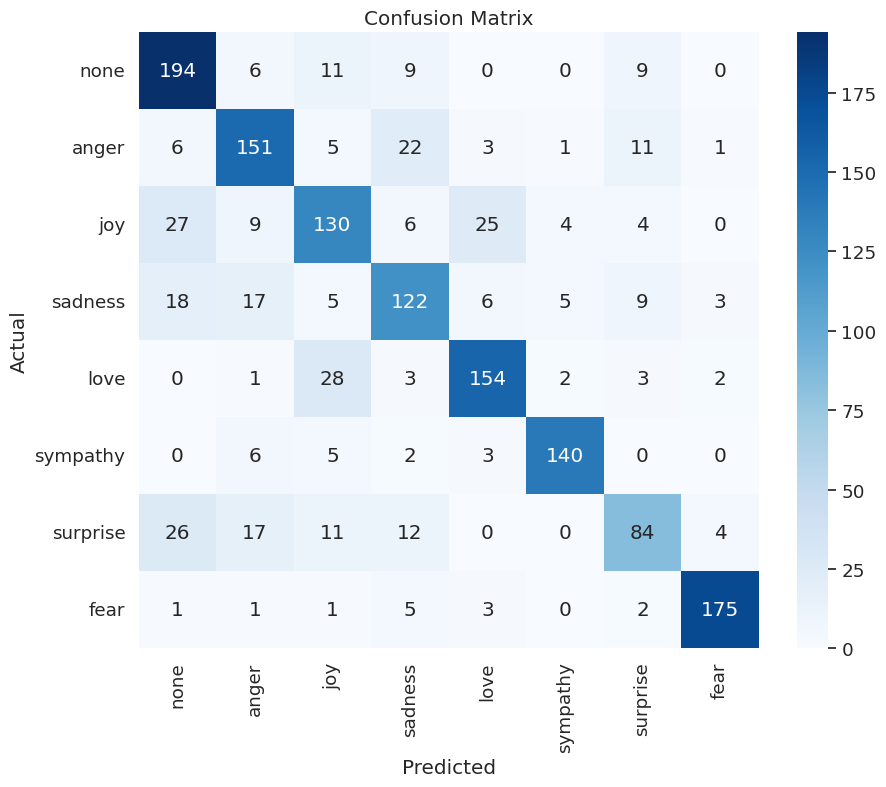

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(X_test['label'], test_pred)

plt.figure(figsize=(10, 8))
sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()